<a href="https://colab.research.google.com/github/wisamreid/pytorch_data_loader_tutorial/blob/main/Training_With_Random_Data_(Submission).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FLAGS

In [ ]:
save_pickle_as_sheet = False
DEBUG = False
SAVE_MODEL = True

### DEBUGGING



In [ ]:
if DEBUG:
    !pip install -Uqq ipdb
    import ipdb

    print("ipdb imported")

### Check to see if we're running in Colab (versus local server)

In [ ]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

We're running Colab


### Mount Google Drive

In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Mount GDrive to /content/gdrive</h3></center><br>
mount='/content/drive'
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount(mount, force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


###Drive Root

In [ ]:
import os
import sys

drive_root = mount + "/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/"

print("Project Folder Contents:")
# cd to the gdrive directory for this assignment
%cd $drive_root
! ls # This location contains the data and this notebook

Project Folder Contents:
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2
'Assignment 2: Training on a new dataset.gdoc'
 Data
'[Epoch Analysis] - My Copy of PyTorch_cifar10_Regula.ipynb'
'Extra Code'
 model.pt
 pytorch_data_loader_tutorial
 REBUILD_pytorch_data_loader_tutorial.ipynb
 Training_With_Random_Data.ipynb
'Trining_With_Random_Data_1 00_Epochs.ipynb'


### Data Root

In [ ]:
data_root = drive_root + "Data/"

# cd to the gdrive directory for this assignment
%cd $data_root
print("Data Folder Contents:")
! ls # This location contains the data

/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data
Data Folder Contents:
 att_dict_simplified.gsheet   biased_cars_1	 'Test Folder'
 att_dict_simplified.p	      biased_cars_1.zip


Unzipping The Data

In [ ]:
# zip_location = data_root + "biased_cars_1.zip"
# !unzip $zip_location -d "." # Not sure this works

In [ ]:
data_location = data_root + "biased_cars_1/"
print("data_location:")
print(data_location)

data_location:
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/


### Pickle File

In [ ]:
import pickle
# import ast

# Read the data from the file
with open('att_dict_simplified.p', 'rb') as fid:
     att_dict_simplified = pickle.load(fid)

# # convert dictionary string to dictionary
# att_dict_simplified = ast.literal_eval(att_dict_simplified)

print('Data After  Read :', att_dict_simplified)
print("Length : %d" % len (att_dict_simplified))

dictionary_items = att_dict_simplified.items()
print("('filename', [rotation, scale, car model, car color])")
for i in range(2000,2050):
    print(list(dictionary_items)[i])

In [ ]:
# Already saved and moved to the data folder 
# this code needs modification to include saving into particular 
# directories

if save_pickle_as_sheet:

    from google.colab import auth
    auth.authenticate_user()

    import gspread
    from google.auth import default
    creds, _ = default()

    gc = gspread.authorize(creds)

    sh = gc.create('att_dict_simplified')

    # Open our new sheet and add some data.
    worksheet = gc.open('att_dict_simplified').sheet1

    cell_list = worksheet.range('A1:B'+ str(len(att_dict_simplified)+ 1))

    idx = 0
    for key, value in att_dict_simplified.items():
        cell_list[idx].value = key
        cell_list[idx+1].value = str(value)
        idx += 2

    worksheet.update_cells(cell_list)
    # Go to https://sheets.google.com to see your new spreadsheet.

### Github Repos

In [ ]:
# Let's load the working directory from our Git repo !
repo_url = "https://github.com/wisamreid/pytorch_data_loader_tutorial.git"

# Clone the repo unless it is already there
repo_root = os.path.join(drive_root,"pytorch_data_loader_tutorial/")

# Clone or refresh from the repo depending on whether we've cloned before
if not os.path.exists( repo_root ):
    print("Cloning from Git url: ", repo_url)
    ! git clone $repo_url
else:
    print("Refreshing from Git url: ", repo_url)
    %cd $repo_root
    ! git pull origin main

print("\nChange working directory to drive root")
%cd $drive_root

Refreshing from Git url:  https://github.com/wisamreid/pytorch_data_loader_tutorial.git
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/pytorch_data_loader_tutorial
From https://github.com/wisamreid/pytorch_data_loader_tutorial
 * branch            main       -> FETCH_HEAD
Already up to date.

Change working directory to drive root
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2


### Imports

In [ ]:
%cd $repo_root 
from google.colab import files
# sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/')

/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/pytorch_data_loader_tutorial


In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from my_fine_tuning_config_file import *
from my_custom_loader import ImageFolder as CustomLoader
from my_custom_simple_cnn import SimpleCNN

In [ ]:
%cd $drive_root

/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2


### TensorBoard

In [ ]:
## If you want to keep a track of your network on tensorboard, 
# set USE_TENSORBOARD TO 1 in config file.

if USE_TENSORBOARD:
    from pycrayon import CrayonClient
    cc = CrayonClient(hostname=TENSORBOARD_SERVER)
    try:
        cc.remove_experiment(EXP_NAME)
    except:
        pass
    foo = cc.create_experiment(EXP_NAME)

### GPU Mode

In [ ]:
# If you want to use the GPU, set GPU_MODE TO 1 in config file
use_gpu = GPU_MODE
if use_gpu:
    if torch.cuda.is_available():
        # cuda_device = torch.cuda.set_device(CUDA_DEVICE)
        cuda_device = torch.cuda.device(CUDA_DEVICE)
        print(cuda_device)

### Data loading and shuffling/augmentation/normalization (all handled by torch automatically).

In [ ]:
# If you want to read more, transforms is a function from torchvision, and you can go read more here - http://pytorch.org/docs/master/torchvision/transforms.html
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

### SECTION 3 : Writing the functions that do training and validation phase.

**Generating the dataset**

In [ ]:
# %debug 

# MODIFIED 
dsets = {x: CustomLoader(dataset_type=x,labels=att_dict_simplified, root=data_location, transform=data_transforms[x])
         for x in ['train', 'val']}

# ADDITION
testset = CustomLoader(dataset_type='test',labels=att_dict_simplified, root=data_location, transform=data_transforms['val'])

dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=BATCH_SIZE,
                                               shuffle=True, num_workers=25)
                for x in ['train', 'val']}

# ADDITION
test_loader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                               shuffle=False, num_workers=25)

dset_sizes = {x: len(dsets[x]) for x in ['train', 'val']}
dset_classes = dsets['train'].classes

testset_size = len(testset)
testset_labels = testset.classes

/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/BLUE_CARS_9_SCALE_3_ROTATION/train/images
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/GREEN_CARS_9_SCALE_2_ROTATION/train/images
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/GREEN_CARS_9_SCALE_4_ROTATION/train/images
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/GREEN_CARS_9_SCALE_3_ROTATION/train/images
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/REBUTTAL_BLACK_CARS_9_SCALE_0_ROTATION/train/images
/content/drive/MyDrive/School [Drive]/Harvard [Drive]/Spring 2022 [Drive]/Neuro 240/Assignments/Assignment 2/Data/biased_cars_1/REBUTTAL_

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 25 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### Image Display Function Definition

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 25 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


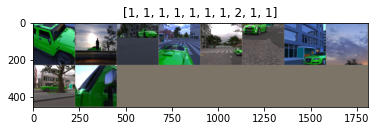

In [ ]:
# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))
inputs, classes = next(iter(dset_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
imshow(out, title=[dset_classes[x] for x in classes])

### Model Training (Function Def)

These functions do forward propogation, back propogation, loss calculation, update weights of model, and save best model!

In [ ]:
def train_model(model, criterion, optimizer, lr_scheduler, num_epochs=100):
    since = time.time()

    best_model = model
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                mode='train'
                optimizer = lr_scheduler(optimizer, epoch)
                model.train()  # Set model to training mode
            else:
                model.eval()
                mode='val'

            running_loss = 0.0
            running_corrects = 0

            counter=0
            # Iterate over data.
            for data in dset_loaders[phase]:
                inputs, labels = data
                print(inputs.size())
                # wrap them in Variable
                if use_gpu:
                    try:
                        inputs, labels = Variable(inputs.float().cuda()),
                        Variable(labels.long().cuda())
                    except:
                        print(inputs,labels)
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # Set gradient to zero to delete history of computations in previous epoch. Track operations so that differentiation can be done automatically.
                optimizer.zero_grad()
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)

                loss = criterion(outputs, labels)
                # print('loss done')
                # # Just so that you can keep track that something's happening and don't feel like the program isn't running.
                # if counter%10==0:
                #     print("Reached iteration ",counter)
                counter+=1

                # backward + optimize only if in training phase
                if phase == 'train':
                    # print('loss backward')
                    loss.backward()
                    # print('done loss backward')
                    optimizer.step()
                    # print('done optim')
                # print evaluation statistics
                try:
                    # running_loss += loss.data[0]
                    running_loss += loss.item()
                    # print(labels.data)
                    # print(preds)
                    running_corrects += torch.sum(preds == labels.data)
                    # print('running correct =',running_corrects)
                except:
                    print('unexpected error, could not calculate loss or do a sum.')
            print('trying epoch loss')
            epoch_loss = running_loss / dset_sizes[phase]
            epoch_acc = running_corrects.item() / float(dset_sizes[phase])
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val':
                if USE_TENSORBOARD:
                    foo.add_scalar_value('epoch_loss',epoch_loss,step=epoch)
                    foo.add_scalar_value('epoch_acc',epoch_acc,step=epoch)
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model = copy.deepcopy(model)
                    print('new best accuracy = ',best_acc)
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('returning and looping back')
    return best_model

# This function changes the learning rate over the training model.
def exp_lr_scheduler(optimizer, epoch, init_lr=BASE_LR, lr_decay_epoch=EPOCH_DECAY):
    """Decay learning rate by a factor of DECAY_WEIGHT every lr_decay_epoch epochs."""
    lr = init_lr * (DECAY_WEIGHT**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer

### SECTION 4 : DEFINING MODEL ARCHITECTURE.

We use Resnet18 here. If you have more computational power, feel free to swap it with Resnet50, Resnet100 or Resnet152.

Since we are doing fine-tuning, or transfer learning we will use the pretrained net weights. In the last line, the number of classes has been specified.

Set the number of classes in the config file by setting the right value for NUM_CLASSES.


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, NUM_CLASSES)
# model_ft = model_ft.to(cuda_device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

**Model Summary**

Displays model details

In [ ]:
# # !pip install torchinfo
# from torchinfo import summary

# batch_size = BATCH_SIZE
# summary(model_ft, input_size=(batch_size, 3,224,224)) #,device=cuda_device)
# # model_ft = model_ft.to(cuda_device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('----------------------------------')
print('Number Of Parameters:')
print('----------------------------------')
count_parameters(model_ft)



----------------------------------
Number Of Parameters:
----------------------------------


11179077

In [ ]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Train Model

In [ ]:
# %debug
counter =0

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.RMSprop(model_ft.parameters(), lr=0.0001)

# Run the functions and save the best model in the function model_ft.
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)

Epoch 0/99
----------
LR is set to 0.001


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 25 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Streaming output truncated to the last 5000 lines.
          [-1.6650, -1.6824, -1.6824,  ..., -0.6890, -0.6541, -0.6018],
          [-1.6650, -1.6650, -1.6476,  ..., -0.6367, -0.6367, -0.4101],
          [-1.6476, -1.6650, -1.6302,  ..., -0.6018, -0.5495, -0.4450]]],


        [[[ 0.6906,  0.6734,  0.6563,  ..., -0.2684, -0.2684, -0.2513],
          [ 0.6906,  0.6734,  0.6906,  ..., -0.2684, -0.2684, -0.2513],
          [ 0.6392,  0.6563,  0.6734,  ..., -0.2856, -0.2856, -0.2513],
          ...,
          [-1.5870, -1.6042, -1.5870,  ..., -1.0048, -1.0048, -1.0219],
          [-1.5699, -1.6042, -1.5870,  ..., -1.0048, -1.0048, -1.0390],
          [-1.6042, -1.6042, -1.6042,  ..., -1.0048, -1.0390, -1.0048]],

         [[ 1.8333,  1.8158,  1.7983,  ...,  0.7829,  0.8004,  0.8354],
          [ 1.8333,  1.8158,  1.8333,  ...,  0.8004,  0.8004,  0.8354],
          [ 1.7983,  1.7983,  1.8158,  ...,  0.7829,  0.8004,  0.8354],
          ...,
          [-1.1779, -1.1954, -1.1779,  ..., -0.23

Save Model

In [ ]:
if SAVE_MODEL:
    # Save model
    torch.save(model_ft.state_dict(), os.path.join(drive_root,'model.pt'))

### TEST MODEL

In [ ]:
from tqdm import tqdm

eval_losses=[]
eval_accu=[]

def test(epoch):
    
    model_ft.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for data in tqdm(test_loader):
            # images,labels=data[0].to(device),data[1].to(device)
            images,labels = data[0], data[1]
      
            outputs=model_ft(images)

            loss = criterion(outputs,labels)
            running_loss += loss.item()
      
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss=running_loss/len(test_loader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu)) 

In [ ]:
epochs=5
for epoch in range(1,epochs+1): 
    test(epoch)

  0%|          | 0/106 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 25 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 106/106 [00:24<00:00,  4.27it/s]


Test Loss: 0.062 | Accuracy: 97.249


100%|██████████| 106/106 [00:18<00:00,  5.75it/s]


Test Loss: 0.062 | Accuracy: 97.249


100%|██████████| 106/106 [00:18<00:00,  5.78it/s]


Test Loss: 0.062 | Accuracy: 97.249


100%|██████████| 106/106 [00:18<00:00,  5.87it/s]


Test Loss: 0.062 | Accuracy: 97.249


100%|██████████| 106/106 [00:18<00:00,  5.80it/s]

Test Loss: 0.062 | Accuracy: 97.249
